In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import itertools
import re
from itertools import product
import operator
from functools import reduce
#from pandas import option_context
#%pip install openpyxl
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-pastel')
plt.style.use('seaborn-dark')

/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_53010/1792471945.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')
/var/folders/t5/84slq0fn2gx51rghrcgxpjt80000gn/T/ipykernel_53010/1792471945.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [1]:
import matplotlib
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
matplotlib.style.use('seaborn-v0_8')
color_list = ['white','skyblue','pink', 'tomato', 'slateblue', 'wheat', 'lightgrey', 'limegreen', 'royalblue', 'yellowgreen', 'lightseagreen', 'orchid', 'orange']
cmap = LinearSegmentedColormap.from_list("",color_list)

In [2]:
# Import all the google connexion packages
import os
import google.auth
from google.cloud import bigquery
from google.auth import impersonated_credentials

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "/Users/a20015173/.config/gcloud/legacy_credentials/ekaterina.rezanovich@adeo.com/adc.json"
client_1 = bigquery.Client(project = 'ccdp-transverse-data-dev')

In [3]:
project_id = "ccdp-transverse-data-dev"
dataset_id = "ccdp_kg_project"
table_target = ""
table_target_2 = ""

In [6]:
#filepath_0 = "./datasets/product_concept.parquet"
#df_product_rel_branch = pd.read_parquet(filepath_0)
df_product_rel_branch.head(3)

,product_code,concept_code,concept_level
0,84710930,https://opus-adeo.poolparty.biz/COMMONTAXO/16451,5
1,87148086,https://opus-adeo.poolparty.biz/COMMONTAXO/16875,5
2,86846179,https://opus-adeo.poolparty.biz/COMMONTAXO/16875,5


### User Activity and query

In [7]:
# user query data taring
# date = 2024-01-01 - 2024-01-31
filepath_1 = "./datasets/uq_concept_1_24.parquet"
if not os.path.isfile(filepath_1):

    query = """
    select product_code, concept_code, count(*)
    from
    (SELECT timestamp, searchId,firstNature as concept_code, products.code as product_code
    FROM `opus-prod.frlm_opus_search.PRODUCT_SEARCHES`,
    unnest (products) as products, 
    unnest (firstNAture.codes) as firstNature
    WHERE TIMESTAMP_TRUNC(timestamp, DAY) between TIMESTAMP("2024-01-01") and TIMESTAMP("2024-01-31")
    and firstNature is not null)
    group by 1,2
        """

dl_data = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")
dl_data.to_parquet(filepath_1)
df_uq_r = pd.read_parquet(filepath_1)

In [8]:
#filepath_1 = "./datasets/uq_concept_1_24.parquet"
#df_uq_r = pd.read_parquet(filepath_1)
df_uq_r.head(3)

,product_code,concept_code,f0_
0,70719971,https://opus-adeo.poolparty.biz/COMMONTAXO/5086,251
1,83407496,https://opus-adeo.poolparty.biz/COMMONTAXO/3700,63
2,86143953,https://opus-adeo.poolparty.biz/COMMONTAXO/8492,50


In [9]:
df_uq_r.columns = ['product_code', 'concept_code', 'nb_q']

In [10]:
# user query data taring + relationship catalog level data
# date = 2024-01-01 - 2024-01-07
filepath_2 = "./datasets/piano_data_1_24_1.parquet"
if not os.path.isfile(filepath_2):

    query = """
    SELECT visit_date, visit_id,ISE_KEYWORD, product_id as productCode,
    SUM(IF(event_name = 'product.display', 1, 0)) as nbDisplays,
    SUM(IF(event_name = 'product.click', 1, 0)) as NbClicks
    FROM `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
    WHERE VISIT_DATE between "2024-01-01" and  "2024-01-07"
    AND event_name IN ('product.display', 'product.click')
    AND ise_keyword IS NOT NULL
    GROUP BY 1, 2, 3, 4
    """

    dl_data = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")
    dl_data.to_parquet(filepath_2)

df_piano_1 = pd.read_parquet(filepath_2)

KeyboardInterrupt: 

In [ ]:
df_piano_1['VISIT_DATE'].min()

In [ ]:
df_piano_1['VISIT_DATE'].max()

In [12]:
# user query data taring + relationship catalog level data
# date = 2024-01-08 - 2024-01-14
query = """
    SELECT visit_date, visit_id,ISE_KEYWORD, product_id as productCode,
    SUM(IF(event_name = 'product.display', 1, 0)) as nbDisplays,
    SUM(IF(event_name = 'product.click', 1, 0)) as NbClicks
    FROM `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
    WHERE VISIT_DATE between "2024-01-08" and  "2024-01-14"
    AND event_name IN ('product.display', 'product.click')
    AND ise_keyword IS NOT NULL
    GROUP BY 1, 2, 3, 4
    """
df_piano_2 = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")

KeyboardInterrupt: 

In [ ]:
# user query data taring + relationship catalog level data
# date = 2024-01-08 - 2024-01-14
filepath_3 = "./datasets/piano_data_1_24_2.parquet"
if not os.path.isfile(filepath_3):

    query = """
    SELECT visit_date, visit_id,ISE_KEYWORD, product_id as productCode,
    SUM(IF(event_name = 'product.display', 1, 0)) as nbDisplays,
    SUM(IF(event_name = 'product.click', 1, 0)) as NbClicks
    FROM `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
    WHERE VISIT_DATE between "2024-01-08" and  "2024-01-14"
    AND event_name IN ('product.display', 'product.click')
    AND ise_keyword IS NOT NULL
    GROUP BY 1, 2, 3, 4
    """

    dl_data = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")
    dl_data.to_parquet(filepath_3)

df_piano_2 = pd.read_parquet(filepath_3)
df_piano_2['VISIT_DATE'].min()

In [ ]:
df_piano_2['VISIT_DATE'].max()

In [ ]:
# user query data taring + relationship catalog level data
# date = 2024-01-15 - 2024-01-21
filepath_4 = "./datasets/piano_data_1_24_3.parquet"
if not os.path.isfile(filepath_4):

    query = """
    SELECT visit_date, visit_id,ISE_KEYWORD, product_id as productCode,
    SUM(IF(event_name = 'product.display', 1, 0)) as nbDisplays,
    SUM(IF(event_name = 'product.click', 1, 0)) as NbClicks
    FROM `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
    WHERE VISIT_DATE between "2024-01-15" and  "2024-01-21"
    AND event_name IN ('product.display', 'product.click')
    AND ise_keyword IS NOT NULL
    GROUP BY 1, 2, 3, 4
    """

    dl_data = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")
    dl_data.to_parquet(filepath_4)

df_piano_3 = pd.read_parquet(filepath_4)
df_piano_3['VISIT_DATE'].min()

In [ ]:
df_piano_3['VISIT_DATE'].max()

In [ ]:
# user query data taring + relationship catalog level data
# date = 2024-01-22 - 2024-01-31
filepath_5 = "./datasets/piano_data_1_24_4.parquet"
if not os.path.isfile(filepath_5):

    query = """
    SELECT visit_date, visit_id,ISE_KEYWORD, product_id as productCode,
    SUM(IF(event_name = 'product.display', 1, 0)) as nbDisplays,
    SUM(IF(event_name = 'product.click', 1, 0)) as NbClicks
    FROM `dfdp-customer-experience-prod.PianoAnalytics_BU001.events`
    WHERE VISIT_DATE between "2024-01-22" and  "2024-01-31"
    AND event_name IN ('product.display', 'product.click')
    AND ise_keyword IS NOT NULL
    GROUP BY 1, 2, 3, 4
    """

    dl_data = pd.read_gbq(query=query, project_id="ccdp-transverse-data-dev")
    dl_data.to_parquet(filepath_5)

df_piano_4 = pd.read_parquet(filepath_5)
df_piano_4['VISIT_DATE'].min()

In [ ]:
df_piano_4['VISIT_DATE'].max()

In [ ]:
#filepath_2 = "./datasets/uq_concept_1_24.parquet"
#df_uq_r = pd.read_parquet(filepath_1)
df_uq_r.head(3)

In [27]:
#filepath_2 = "./datasets/piano_data.parquet"
#df_piano = pd.read_parquet(filepath_2)
df_piano.head(3)

,visit_date,visit_id,ISE_KEYWORD,productCode,nbDisplays,NbClicks
0,2024-01-31,94C0314C90D253D684ECDF58F510E406,toile pour pergola en bois,86796966,1,0
1,2024-01-31,7946299E00955D3CA8608BAE81D0424F,carrelage salle de bain mural,82319156,1,0
2,2024-01-31,5ED42584A0D554DA843A84E44B44F768,tapis poils longs,86795673,1,0


In [28]:
df_piano.columns = ['visit_date', 'visit_id', 'key_word', 'product_code', 'nb_display', 'nb_click']

In [29]:
df_piano_gr = df_piano.groupby('product_code').agg(nb_display=('nb_display', 'sum'), nb_click=('nb_click', 'sum'),\
                                                   nb_visit=('visit_id', 'nunique')).reset_index()
df_piano_gr.head()

,product_code,nb_display,nb_click,nb_visit
0,10015831,3,0,3
1,10021445,19,2,17
2,10021515,3,0,3
3,10021522,2,0,2
4,10021564,18,0,17
...,...,...,...,...
978040,993342,13,0,11
978041,994833,26,0,20
978042,994840,40,4,34
978043,995442,5,0,5


In [32]:
df_uq_pr_act = df_uq_r.merge(df_piano_gr, left_on = 'product_code', right_on='product_code', how='left')
df_uq_pr_act.head(3)

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit
0,85854594,https://opus-adeo.poolparty.biz/COMMONTAXO/4070,75,22,1,21.0
1,84596631,https://opus-adeo.poolparty.biz/COMMONTAXO/16478,83,44,0,41.0
2,85559622,https://opus-adeo.poolparty.biz/COMMONTAXO/2929,31,19,0,18.0


In [33]:
df_uq_pr_act['ctr'] = (df_uq_pr_act['nb_click'] / df_uq_pr_act['nb_display']).round(2)
df_uq_pr_act.head(3)

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit,ctr
0,85854594,https://opus-adeo.poolparty.biz/COMMONTAXO/4070,75,22,1,21.0,0.05
1,84596631,https://opus-adeo.poolparty.biz/COMMONTAXO/16478,83,44,0,41.0,0.0
2,85559622,https://opus-adeo.poolparty.biz/COMMONTAXO/2929,31,19,0,18.0,0.0


In [34]:
df_uq_pr_act.shape[0]

8677177

In [35]:
df_uq_pr_act[df_uq_pr_act['nb_display']<df_uq_pr_act['nb_click']].shape[0]

3637

In [36]:
df_uq_pr_act[df_uq_pr_act['nb_display']>df_uq_pr_act['nb_click']].shape[0]

6581396

In [37]:
df_uq_pr_act[df_uq_pr_act['nb_display'].isna()].shape[0]

2073857

There are 3 type of data:  
1. correct : nb_display >= nb_click  
2. not correct : nb_display < nb_click  
3. no user activity data in piano  
--> use only data with user activity from piano

In [38]:
#df with clean user activity data
df_uq_pr_act = df_uq_pr_act[df_uq_pr_act['nb_display']>=df_uq_pr_act['nb_click']]
df_uq_pr_act.shape[0]

6599683

In [39]:
df_uq_pr_act.head(2)

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit,ctr
0,85854594,https://opus-adeo.poolparty.biz/COMMONTAXO/4070,75,22,1,21.0,0.05
1,84596631,https://opus-adeo.poolparty.biz/COMMONTAXO/16478,83,44,0,41.0,0.0


For some concepts there are strange nb of products in the search data. Check the example with concept https://opus-adeo.poolparty.biz/COMMONTAXO/1239

In [59]:
df_uq_pr_act[df_uq_pr_act['concept_code']=='https://opus-adeo.poolparty.biz/COMMONTAXO/1239']\
    .groupby('concept_code')['product_code'].nunique().reset_index()

,concept_code,product_code
0,https://opus-adeo.poolparty.biz/COMMONTAXO/1239,48


In [60]:
df_pr_conc[df_pr_conc['concept_code']=='https://opus-adeo.poolparty.biz/COMMONTAXO/1239']\
    .groupby('concept_code')['product_code'].nunique().reset_index()

,concept_code,product_code
0,https://opus-adeo.poolparty.biz/COMMONTAXO/1239,5


Looks like in search data there are more products linked to the concept --> filter only products with correct concept according to the KG info

SELECT date, productCode, concepts.code  
FROM `opus-prod.frlm_opus_knowledge_graph.CONCEPT_CODES_CONTAINING_PRODUCT`,  
unnest (concepts) as concepts  
where concepts.code like '%/1239'  
order by date desc, productCode desc  

In [64]:
df_pr_conc_2 = df_pr_conc.copy()
df_pr_conc_2.columns = ['pr_c','d','conc_c']
df_pr_conc_2.head(2)

,pr_c,d,conc_c
0,89959659,2024-01-12 21:48:19.027,https://opus-adeo.poolparty.biz/COMMONTAXO/3387
1,89963789,2024-01-10 04:24:06.630,https://opus-adeo.poolparty.biz/COMMONTAXO/3387


In [65]:
df_uq_pr_act.shape[0]

6599683

In [68]:
df_uq_pr_act = df_uq_pr_act.merge(df_pr_conc_2[['pr_c','d','conc_c']], left_on=['product_code','concept_code'],\
                                    right_on=['pr_c','conc_c'], how='left')
df_uq_pr_act.head()

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit,ctr,pr_c,d,conc_c
0,85854594,https://opus-adeo.poolparty.biz/COMMONTAXO/4070,75,22,1,21.0,0.05,85854594,2022-10-13 09:49:21.937,https://opus-adeo.poolparty.biz/COMMONTAXO/4070
1,84596631,https://opus-adeo.poolparty.biz/COMMONTAXO/16478,83,44,0,41.0,0.0,NaN,NaT,NaN
2,85559622,https://opus-adeo.poolparty.biz/COMMONTAXO/2929,31,19,0,18.0,0.0,85559622,2024-01-25 09:04:06.320,https://opus-adeo.poolparty.biz/COMMONTAXO/2929
3,83306604,https://opus-adeo.poolparty.biz/COMMONTAXO/2258,51,21,1,20.0,0.05,83306604,2022-10-10 19:09:34.156,https://opus-adeo.poolparty.biz/COMMONTAXO/2258
4,88280281,https://opus-adeo.poolparty.biz/COMMONTAXO/3045,22,6,1,6.0,0.17,88280281,2022-08-02 12:49:04.833,https://opus-adeo.poolparty.biz/COMMONTAXO/3045


In [82]:
def pr_c(df):
    if df['pr_c']==df['product_code']:
        return 1
    else:
        return 0

In [83]:
df_uq_pr_act['pr_check'] = df_uq_pr_act.apply(pr_c, axis=1)
df_uq_pr_act.head()

,product_code,concept_code,nb_q,nb_display,nb_click,nb_visit,ctr,pr_c,d,conc_c,pr_check
0,85854594,https://opus-adeo.poolparty.biz/COMMONTAXO/4070,75,22,1,21.0,0.05,85854594,2022-10-13 09:49:21.937,https://opus-adeo.poolparty.biz/COMMONTAXO/4070,1
1,84596631,https://opus-adeo.poolparty.biz/COMMONTAXO/16478,83,44,0,41.0,0.0,NaN,NaT,NaN,0
2,85559622,https://opus-adeo.poolparty.biz/COMMONTAXO/2929,31,19,0,18.0,0.0,85559622,2024-01-25 09:04:06.320,https://opus-adeo.poolparty.biz/COMMONTAXO/2929,1
3,83306604,https://opus-adeo.poolparty.biz/COMMONTAXO/2258,51,21,1,20.0,0.05,83306604,2022-10-10 19:09:34.156,https://opus-adeo.poolparty.biz/COMMONTAXO/2258,1
4,88280281,https://opus-adeo.poolparty.biz/COMMONTAXO/3045,22,6,1,6.0,0.17,88280281,2022-08-02 12:49:04.833,https://opus-adeo.poolparty.biz/COMMONTAXO/3045,1


In [84]:
df_uq_pr_act.groupby('pr_check')['product_code'].nunique().reset_index()

,pr_check,product_code
0,0,787535
1,1,794846


In [85]:
df_uq_pr_act = df_uq_pr_act[df_uq_pr_act['pr_check']==1]

Concept metrics

In [86]:
df_uq_concept_ctr = df_uq_pr_act.groupby('concept_code').agg({'product_code': 'nunique', 'nb_q': 'sum',\
                                                              'nb_display': 'sum', 'nb_click': 'sum',\
                                                              'nb_visit': 'sum', 'ctr': 'mean'}).reset_index()
df_uq_concept_ctr.columns = ['concept_code', 'nb_pr_in_uq', 'nb_q', 'nb_display', 'nb_click', 'nb_visit', 'avg_ctr']
df_uq_concept_ctr.head(3)

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr
0,https://opus-adeo.poolparty.biz/COMMONTAXO/10,27,116,598,19,503.0,0.011481
1,https://opus-adeo.poolparty.biz/COMMONTAXO/100,567,9781,4161,245,3510.0,0.037884
2,https://opus-adeo.poolparty.biz/COMMONTAXO/1000,48,240,1007,36,860.0,0.031875


Create the table with number of products in the concept

In [87]:
df_pr_conc.head(2)

,product_code,date,concept_code
0,89959659,2024-01-12 21:48:19.027,https://opus-adeo.poolparty.biz/COMMONTAXO/3387
1,89963789,2024-01-10 04:24:06.630,https://opus-adeo.poolparty.biz/COMMONTAXO/3387


In [88]:
df_concept_gr = df_pr_conc.groupby('concept_code')['product_code'].nunique().reset_index()
df_concept_gr.columns = ['concept_code','nb_pr']
df_concept_gr.head()

,concept_code,nb_pr
0,https://opus-adeo.poolparty.biz/COMMONTAXO/1,53964
1,https://opus-adeo.poolparty.biz/COMMONTAXO/10,107
2,https://opus-adeo.poolparty.biz/COMMONTAXO/100,1904
3,https://opus-adeo.poolparty.biz/COMMONTAXO/1000,797
4,https://opus-adeo.poolparty.biz/COMMONTAXO/1001,29


In [89]:
df_concept_metrics_1 = df_uq_concept_ctr.merge(df_concept_gr, left_on='concept_code', right_on='concept_code', how='left')
df_concept_metrics_1.head(3)

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr
0,https://opus-adeo.poolparty.biz/COMMONTAXO/10,27,116,598,19,503.0,0.011481,107
1,https://opus-adeo.poolparty.biz/COMMONTAXO/100,567,9781,4161,245,3510.0,0.037884,1904
2,https://opus-adeo.poolparty.biz/COMMONTAXO/1000,48,240,1007,36,860.0,0.031875,797


Create the table with rating of the concept according to the user activity

In [90]:
df_uq_r.head(2)

,product_code,concept_code,nb_q
0,85854594,https://opus-adeo.poolparty.biz/COMMONTAXO/4070,75
1,84596631,https://opus-adeo.poolparty.biz/COMMONTAXO/16478,83


In [91]:
df_uq_gr = df_uq_r.groupby('concept_code')['nb_q'].sum().reset_index()
# del df_uq_gr['index']
df_uq_gr = df_uq_gr.sort_values(by='nb_q', ascending=False).reset_index()
df_uq_gr['rating'] = df_uq_gr.index
df_uq_gr.head()

,index,concept_code,nb_q,rating
0,4073,https://opus-adeo.poolparty.biz/COMMONTAXO/3097,1309001,0
1,4409,https://opus-adeo.poolparty.biz/COMMONTAXO/3474,1292345,1
2,7386,https://opus-adeo.poolparty.biz/COMMONTAXO/8600,1278194,2
3,3845,https://opus-adeo.poolparty.biz/COMMONTAXO/2864,1119003,3
4,3125,https://opus-adeo.poolparty.biz/COMMONTAXO/23050,1104999,4


!!! there are not the same numbers for the nb of uwer queries for rating and in the table with the metrics because in the table with the metrics there are only products with data in piano

In [92]:
df_concept_metrics = df_concept_metrics_1.merge(df_uq_gr[['concept_code', 'rating']], left_on='concept_code',\
                                                  right_on = 'concept_code', how='left')
df_concept_metrics.head()

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating
0,https://opus-adeo.poolparty.biz/COMMONTAXO/10,27,116,598,19,503.0,0.011481,107,5250
1,https://opus-adeo.poolparty.biz/COMMONTAXO/100,567,9781,4161,245,3510.0,0.037884,1904,666
2,https://opus-adeo.poolparty.biz/COMMONTAXO/1000,48,240,1007,36,860.0,0.031875,797,5568
3,https://opus-adeo.poolparty.biz/COMMONTAXO/1001,16,360,627,19,516.0,0.0375,29,4228
4,https://opus-adeo.poolparty.biz/COMMONTAXO/1004,21,4651,2291,122,1846.0,0.036667,23,1079


In [93]:
df_concept_metrics['perc_q_pr'] = (df_concept_metrics['nb_pr_in_uq'] / df_concept_metrics['nb_pr']).round(2)
df_concept_metrics = df_concept_metrics.sort_values(by='avg_ctr')
df_concept_metrics.head()

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating,perc_q_pr
6061,https://opus-adeo.poolparty.biz/COMMONTAXO/999,3,29,24,0,22.0,0.0,3,5878,1.00
2852,https://opus-adeo.poolparty.biz/COMMONTAXO/3041,6,79,38,0,38.0,0.0,12,3551,0.50
2861,https://opus-adeo.poolparty.biz/COMMONTAXO/305,3,9,3,0,3.0,0.0,7,1787,0.43
2868,https://opus-adeo.poolparty.biz/COMMONTAXO/3057,13,76,58,0,51.0,0.0,18,5453,0.72
2869,https://opus-adeo.poolparty.biz/COMMONTAXO/306,1,5,10,0,10.0,0.0,3,5830,0.33


#### With these metrics it is possible to check the concepts

Check concept with a lot of products, low ctr and high rating

In [101]:
df_concept_metrics.sort_values(by='nb_pr', ascending=False)

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating,perc_q_pr
3148,https://opus-adeo.poolparty.biz/COMMONTAXO/3387,4889,16253,409049,22405,335963.0,0.033506,1041761,1436,0.00
4820,https://opus-adeo.poolparty.biz/COMMONTAXO/5333,10562,46984,314715,14528,268653.0,0.031558,907375,444,0.01
3153,https://opus-adeo.poolparty.biz/COMMONTAXO/3391,38912,618434,915296,46145,776930.0,0.030241,804707,10,0.05
5848,https://opus-adeo.poolparty.biz/COMMONTAXO/840,16569,90017,545743,26651,453068.0,0.030861,562981,327,0.03
5034,https://opus-adeo.poolparty.biz/COMMONTAXO/5592,31960,528862,524367,23337,456229.0,0.028551,328283,22,0.10
...,...,...,...,...,...,...,...,...,...,...
4771,https://opus-adeo.poolparty.biz/COMMONTAXO/5280,1,2,17,1,15.0,0.06,1,6894,1.00
948,https://opus-adeo.poolparty.biz/COMMONTAXO/1681,1,2,22,0,22.0,0.0,1,7283,1.00
945,https://opus-adeo.poolparty.biz/COMMONTAXO/16800,1,1,3,0,3.0,0.0,1,7058,1.00
889,https://opus-adeo.poolparty.biz/COMMONTAXO/1670,1,3,9,0,7.0,0.0,1,7455,1.00


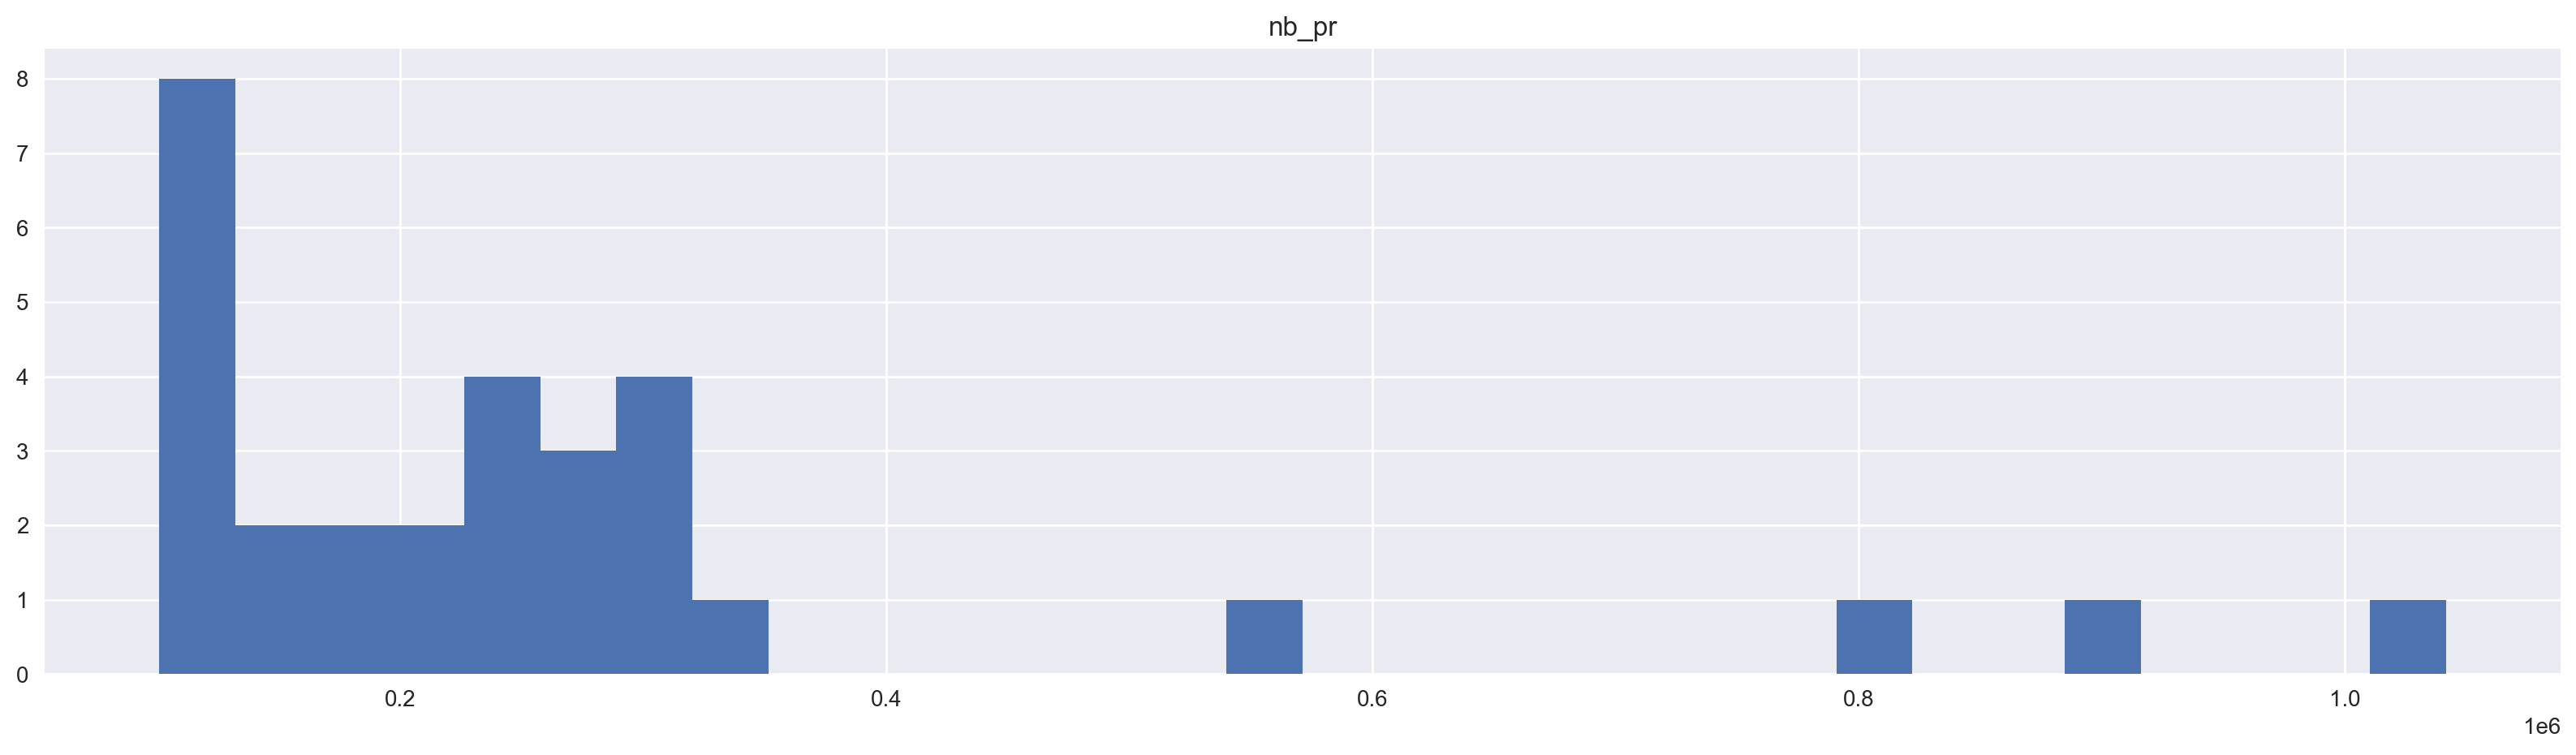

In [103]:
df_concept_metrics[df_concept_metrics['nb_pr']>100000].hist(column='nb_pr', bins = 30, figsize=(20,5));

In [105]:
df_concept_metrics[df_concept_metrics['nb_pr']>100000].sort_values(by=['avg_ctr','rating'], ascending = [True, True]).head(10)

,concept_code,nb_pr_in_uq,nb_q,nb_display,nb_click,nb_visit,avg_ctr,nb_pr,rating,perc_q_pr
4902,https://opus-adeo.poolparty.biz/COMMONTAXO/5444,1219,6484,5073,125,4571.0,0.012084,164223,627,0.01
4921,https://opus-adeo.poolparty.biz/COMMONTAXO/5466,3722,26311,11427,269,10464.0,0.013463,248713,461,0.01
4904,https://opus-adeo.poolparty.biz/COMMONTAXO/5446,1356,12141,5286,130,4833.0,0.014174,149516,1475,0.01
3247,https://opus-adeo.poolparty.biz/COMMONTAXO/3510,6984,144523,38623,1651,34586.0,0.020113,108872,149,0.06
441,https://opus-adeo.poolparty.biz/COMMONTAXO/15263,7404,148450,37555,1660,33554.0,0.024148,150362,151,0.05
3276,https://opus-adeo.poolparty.biz/COMMONTAXO/3555,4374,147937,38047,1512,34112.0,0.02415,115414,198,0.04
5296,https://opus-adeo.poolparty.biz/COMMONTAXO/591,5643,25426,109367,5570,91435.0,0.027914,102063,732,0.06
5034,https://opus-adeo.poolparty.biz/COMMONTAXO/5592,31960,528862,524367,23337,456229.0,0.028551,328283,22,0.10
3153,https://opus-adeo.poolparty.biz/COMMONTAXO/3391,38912,618434,915296,46145,776930.0,0.030241,804707,10,0.05
4838,https://opus-adeo.poolparty.biz/COMMONTAXO/5358,17897,342000,84369,3691,74292.0,0.03081,306990,48,0.06


In [106]:
df_concept_metrics[df_concept_metrics['avg_ctr']==0]['concept_code'].nunique()/df_concept_metrics['concept_code'].nunique()

0.07093368525239195

In [107]:
df_concept_metrics[df_concept_metrics['avg_ctr']==0]['concept_code'].nunique()

430

7 %  (430 concepts on 31/01/2024) of concepts have 0 ctr

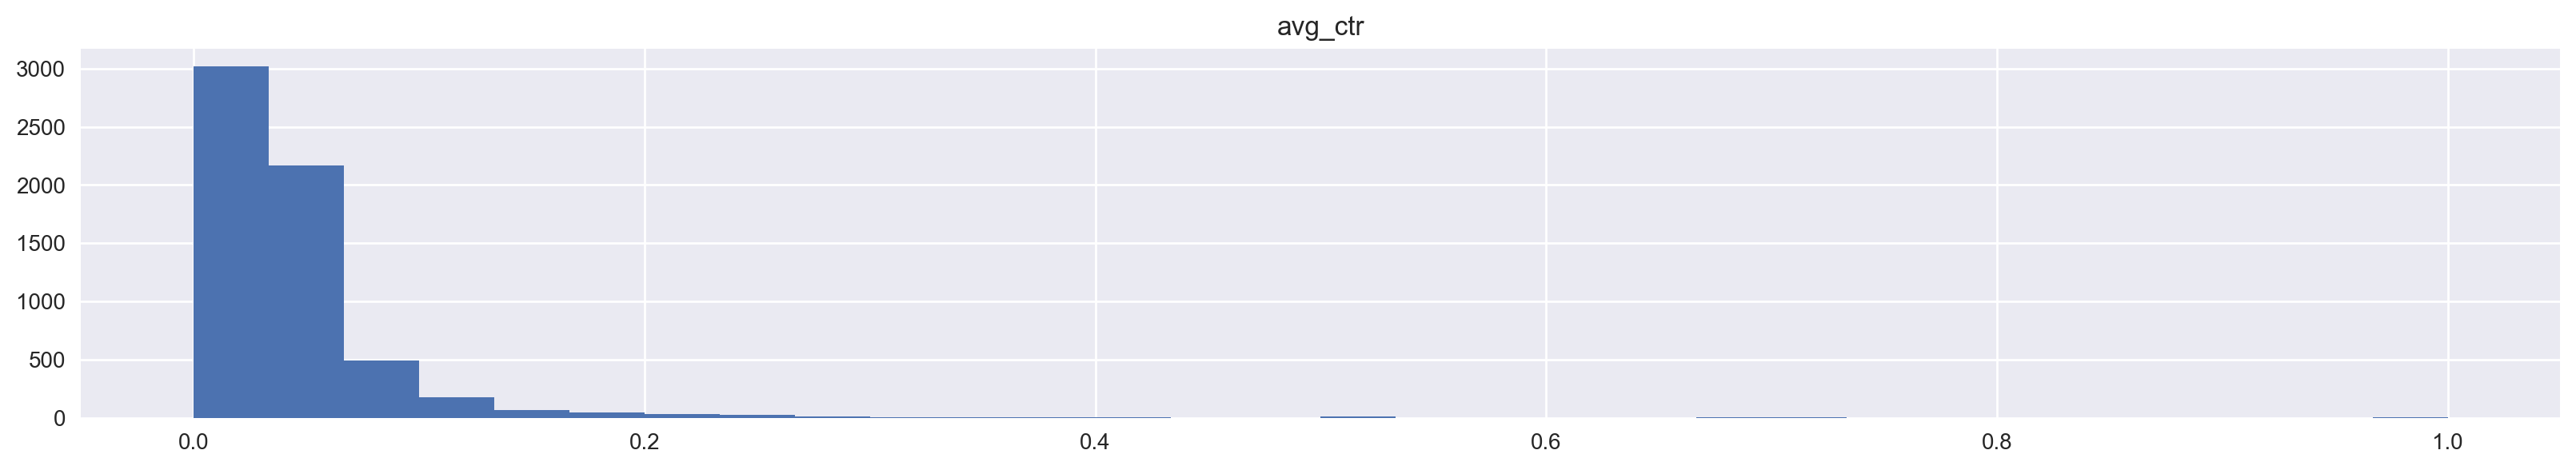

In [112]:
df_concept_metrics.hist(column='avg_ctr', bins = 30, figsize=(20,3));

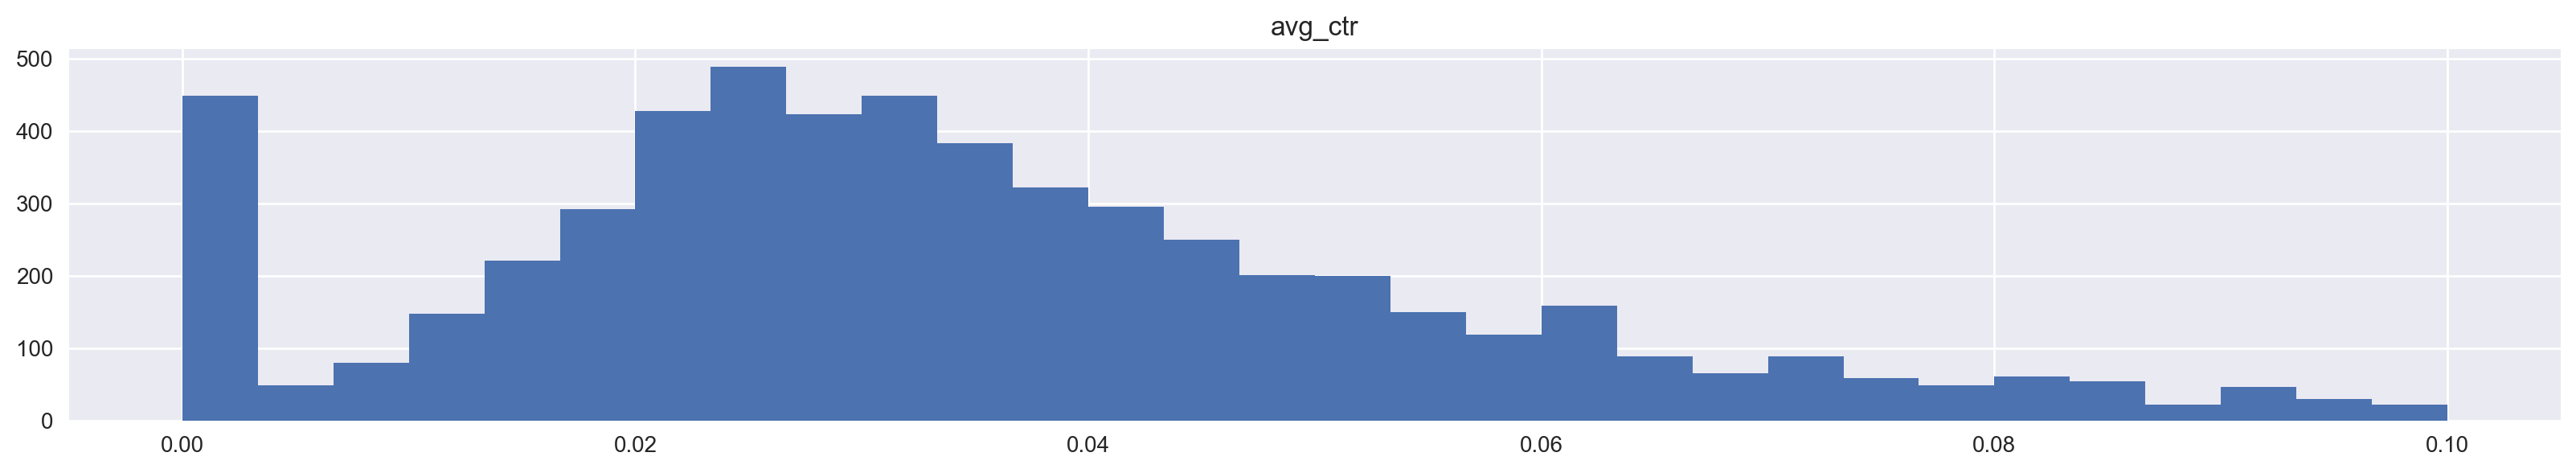

In [113]:
df_concept_metrics[df_concept_metrics['avg_ctr']<0.1].hist(column='avg_ctr', bins = 30, figsize=(20,3));

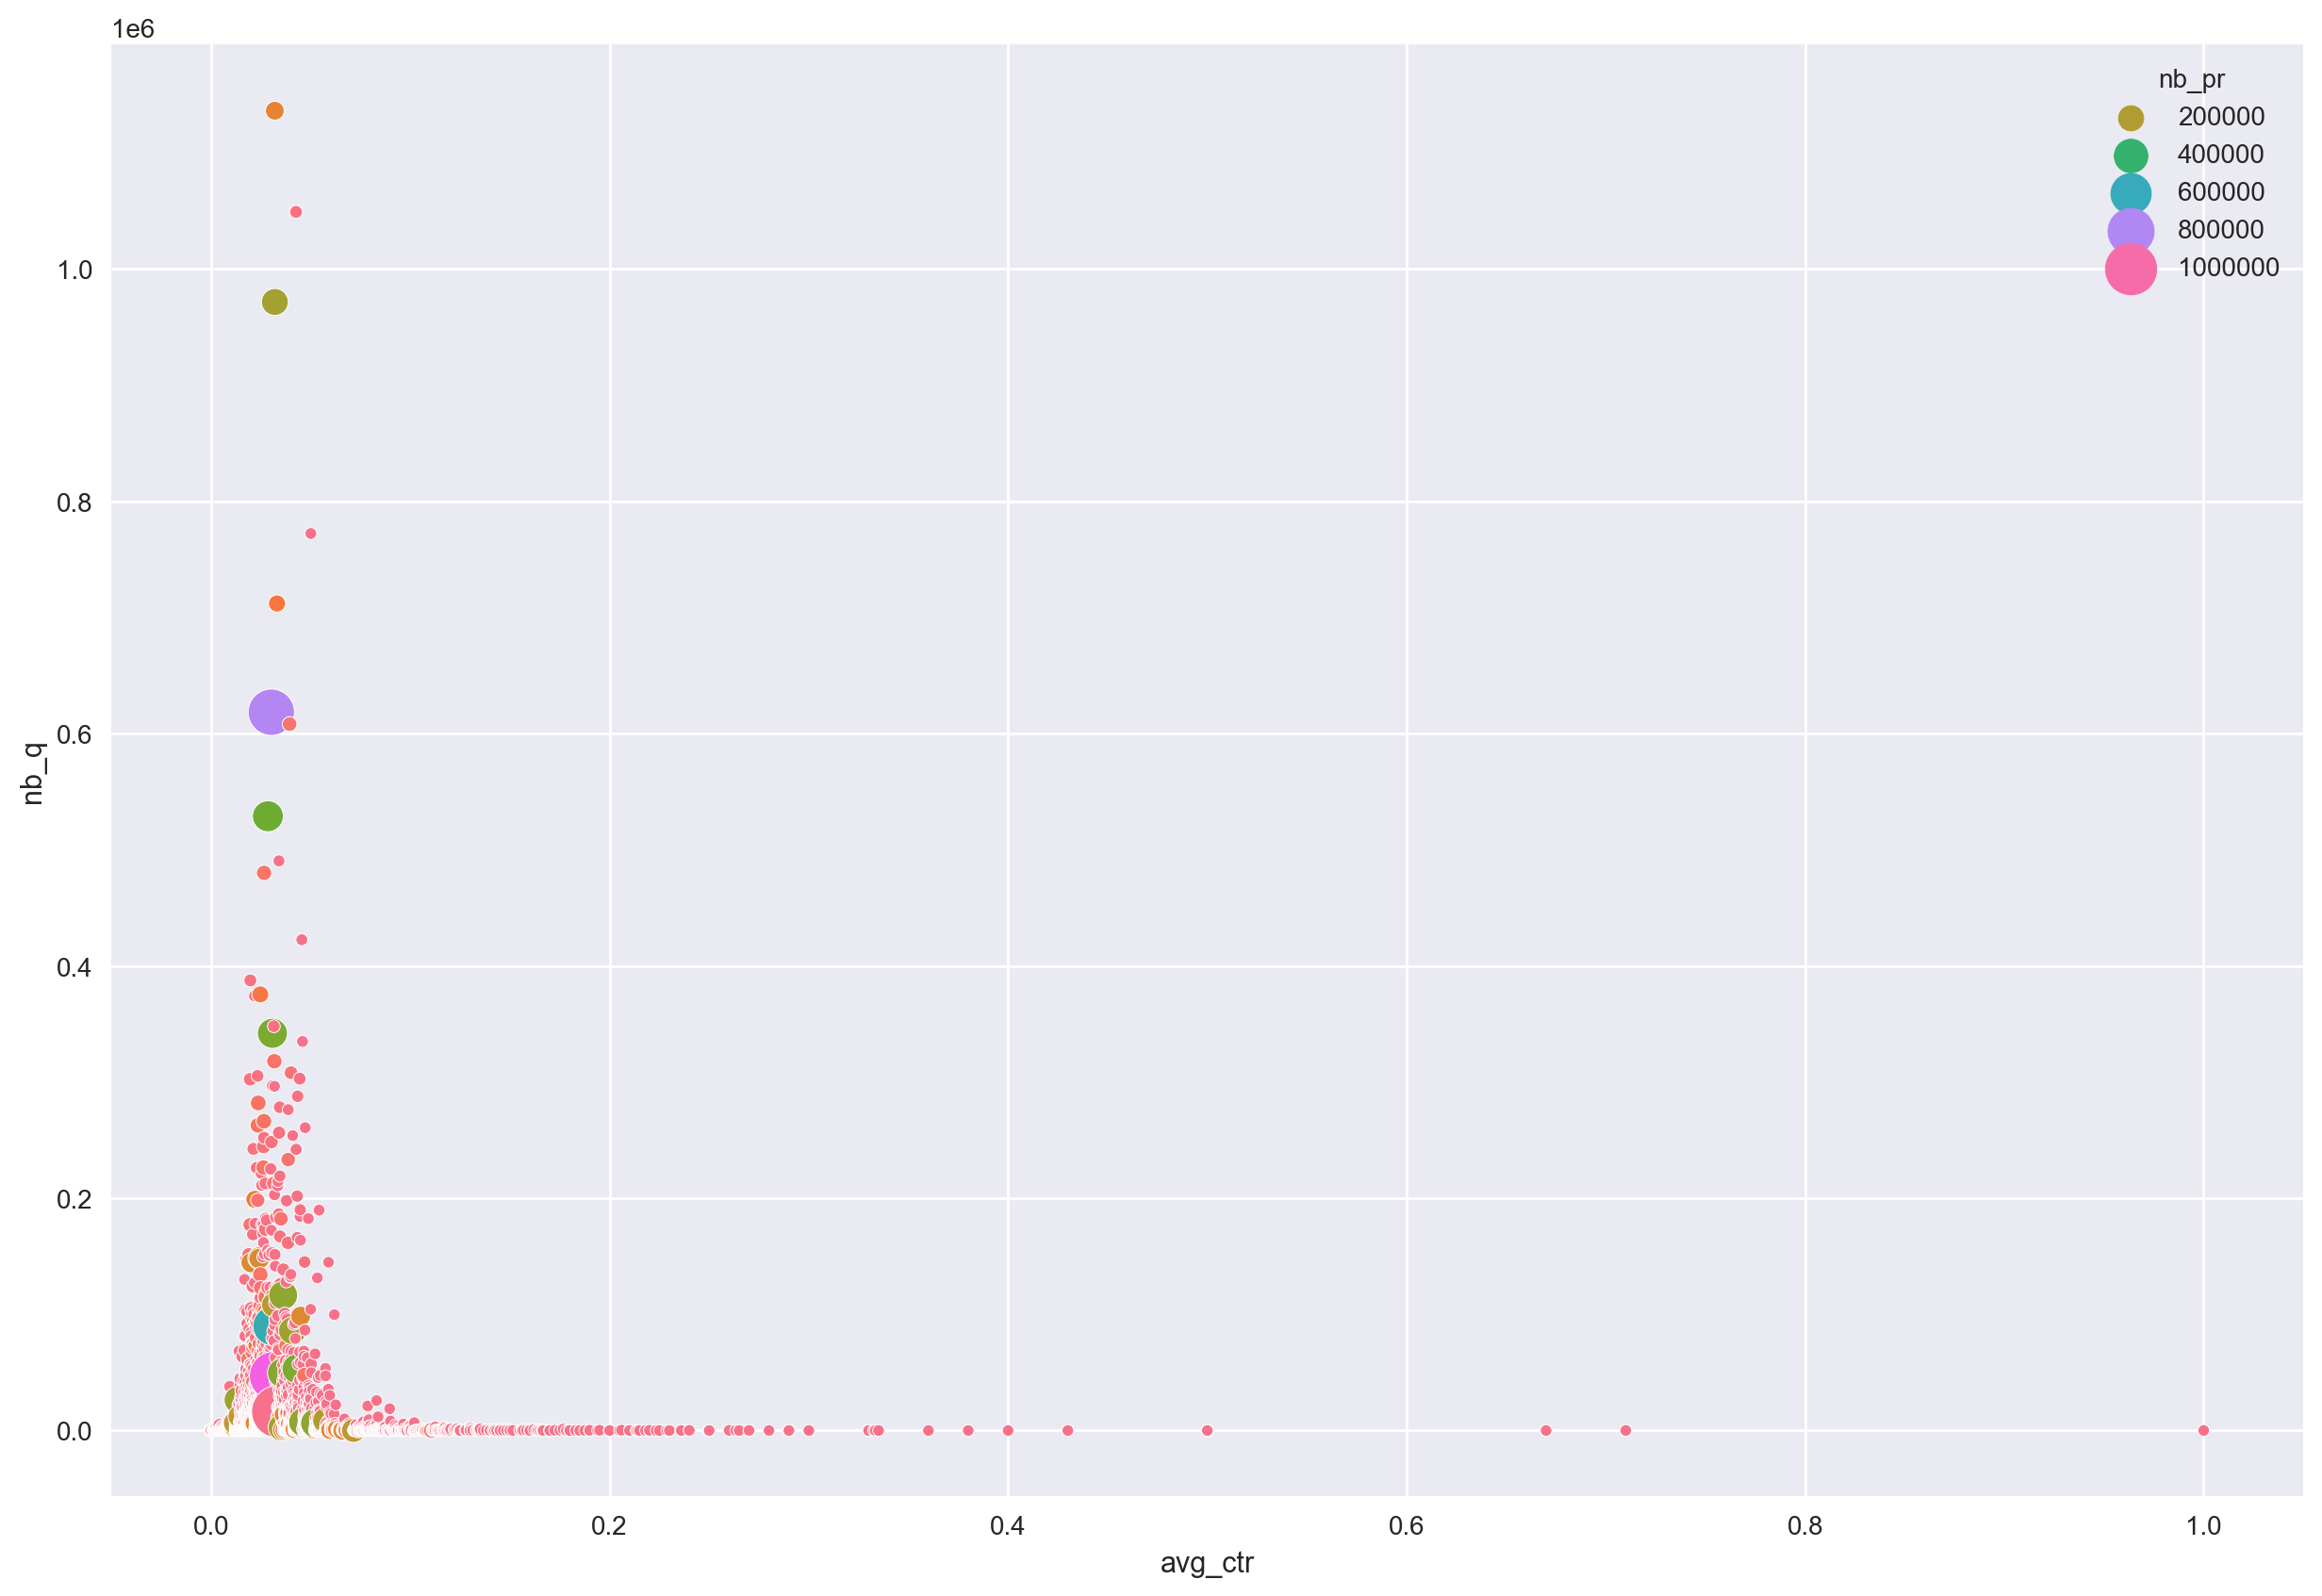

In [139]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_concept_metrics, x='avg_ctr', y="nb_q",  hue="nb_pr", size = "nb_pr", palette="husl", edgecolors="black",\
     alpha=1, sizes=(20, 400))
plt.show()
# size="pop",

There are 3 concepts with low ctr, huge number of user queries and number of products in the concepts. So, it is hypothesis to deep dive.  
--> Incrise the sample to 1 month
--> deep dive into the concept